# ETL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

df = pd.read_csv('poland_basic.csv', sep=';')
df['date'] = pd.to_datetime(df['date'])
df['day'] = range(1, len(df) + 1)
df.head()

,date,infected,day
0,2020-03-04,1,1
1,2020-03-05,1,2
2,2020-03-06,5,3
3,2020-03-07,6,4
4,2020-03-08,11,5


# Define prediction function 

In [2]:
def exp_func(x, a, b):
    return a * np.exp(b * x)

popt, pcov = curve_fit(exp_func, df['day'], df['infected'])

# Plot fitted function

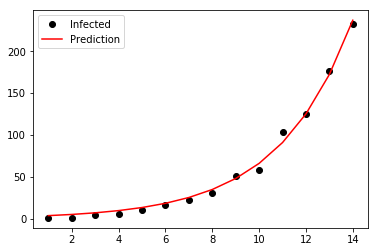

In [3]:
plt.figure()
plt.plot(df['day'], df['infected'], 'ko', label="Infected")
plt.plot(df['day'], exp_func(df['day'], *popt), 'r-', label="Prediction")
plt.legend()
plt.show()

# Predict number of infected people for a few next days

In [4]:
last_day = df.tail(1)
last_date = last_day['date']
last_index = last_day['day']

for i in range(1, 4):
    date = last_date + pd.DateOffset(i)
    predicted = exp_func(last_index + i, *popt)
    print("Date: {}. Predicted infected people: {}".format(date, int(predicted)))



Date: 13   2020-03-18
Name: date, dtype: datetime64[ns]. Predicted infected people: 326
Date: 13   2020-03-19
Name: date, dtype: datetime64[ns]. Predicted infected people: 448
Date: 13   2020-03-20
Name: date, dtype: datetime64[ns]. Predicted infected people: 617
